# Regression

In [1]:
from sklearn.utils import Bunch
import requests
import pandas as pd
import numpy as np

def load_boston(*, return_X_y=False):
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    columns = pd.read_csv(data_url, sep="\s+", skiprows=7, nrows=14, usecols=[0], header=None)
    resp = requests.get(data_url)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    feature_names = columns[0].values[:-1]
    DESCR = resp.text[:resp.text.find("$1000's")+7]
    if return_X_y:
        return data, target
    return Bunch(data=data, target=target, feature_names=feature_names, DESCR=DESCR)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
# from sklearn.datasets import load_boston
from sklearn import (
    model_selection,
    preprocessing,
)
b = load_boston()
bos_X = pd.DataFrame(
    b.data, columns=b.feature_names
)
bos_y = b.target
bos_X_train, bos_X_test, bos_y_train, bos_y_test = model_selection.train_test_split(
    bos_X,
    bos_y,
    test_size=0.3,
    random_state=42,
)
bos_sX = preprocessing.StandardScaler().fit_transform(
    bos_X
)
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(
    bos_sX,
    bos_y,
    test_size=0.3,
    random_state=42,
)

In [3]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
dr.fit(bos_X_train, bos_y_train)
dr.score(bos_X_test, bos_y_test)

-0.03469753992352409

In [4]:
from sklearn.linear_model import (
    LinearRegression,
)
lr = LinearRegression()
lr.fit(bos_X_train, bos_y_train)
lr.score(bos_X_test, bos_y_test)
lr.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [5]:
lr2 = LinearRegression()
lr2.fit(bos_sX_train, bos_sy_train)
lr2.score(bos_sX_test, bos_sy_test)
lr2.intercept_
lr2.coef_

array([-1.14691411,  0.83432605,  0.33940694,  0.79163612, -1.784727  ,
        2.84783949, -0.30429306, -2.91562521,  2.11140045, -1.46519951,
       -1.9696347 ,  1.07567771, -3.90310727])

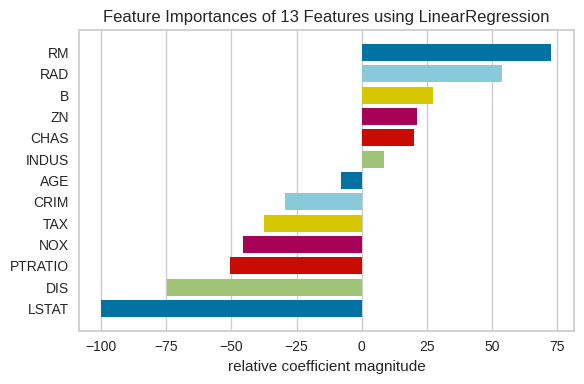

In [6]:
from yellowbrick.features import (
    FeatureImportances,
)
fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(
    lr2, labels=bos_X.columns
)
fi_viz.fit(bos_sX, bos_y)
fi_viz.poof();
# #fig.savefig(
#     "images/mlpr_1401.png",
#     bbox_inches="tight",
#     dpi=300,
# )

In [7]:
from sklearn import datasets
from sklearn.linear_model import (
    LinearRegression,
)
iris = datasets.load_iris()
iX = iris.data
iy = iris.target
lr2 = LinearRegression()
lr2.fit(iX, iy)
list(zip(iris.feature_names, lr2.coef_))

[('sepal length (cm)', -0.11190585392686328),
 ('sepal width (cm)', -0.04007948649493437),
 ('petal length (cm)', 0.2286450272421232),
 ('petal width (cm)', 0.6092520541197897)]

In [8]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(bos_sX_train, bos_sy_train)
svr.score(bos_sX_test, bos_sy_test)

0.6551893976487939

In [9]:
from sklearn.neighbors import (
    KNeighborsRegressor,
)
knr = KNeighborsRegressor()
knr.fit(bos_sX_train, bos_sy_train)
knr.score(bos_sX_test, bos_sy_test)

0.7476242635592416

In [10]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(bos_X_train, bos_y_train)
dtr.score(bos_X_test, bos_y_test)

0.8444833592340152

In [11]:
# import pydotplus
# from io import StringIO
# from sklearn.tree import export_graphviz
# dot_data = StringIO()
# export_graphviz(
#     dtr,
#     out_file=dot_data,
#     feature_names=bos_X.columns,
#     filled=True,
# )
# g = pydotplus.graph_from_dot_data(
#     dot_data.getvalue()
# )
# #g.write_png("images/mlpr_1402.png")

In [12]:
# dot_data = StringIO()
# export_graphviz(
#     dtr,
#     max_depth=2,
#     out_file=dot_data,
#     feature_names=bos_X.columns,
#     filled=True,
# )
# g = pydotplus.graph_from_dot_data(
#     dot_data.getvalue()
# )
# #g.write_png("images/mlpr_1403.png")

/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


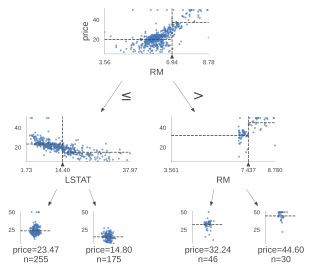

In [13]:
import dtreeviz
dtr3 = DecisionTreeRegressor(max_depth=2)
dtr3.fit(bos_X_train, bos_y_train)
viz = dtreeviz.model(
    dtr3,
    bos_X,
    bos_y,
    target_name="price",
    feature_names=bos_X.columns,
)
viz.view(fontname='sans-serif')

In [14]:
for col, val in sorted(
    zip(
        bos_X.columns, dtr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

RM             0.576
LSTAT          0.190
DIS            0.110
CRIM           0.058
PTRATIO        0.025


In [15]:
from sklearn.ensemble import (
    RandomForestRegressor,
)
rfr = RandomForestRegressor(
    random_state=42, n_estimators=100
)
rfr.fit(bos_X_train, bos_y_train)
rfr.score(bos_X_test, bos_y_test)

0.8708997131330258

In [16]:
for col, val in sorted(
    zip(
        bos_X.columns, rfr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

RM             0.440
LSTAT          0.380
DIS            0.066
CRIM           0.032
PTRATIO        0.019


In [17]:
import xgboost as xgb
xgr = xgb.XGBRegressor(random_state=42)
xgr.fit(bos_X_train, bos_y_train)
xgr.score(bos_X_test, bos_y_test)
xgr.predict(bos_X.iloc[[0]])

array([26.637667], dtype=float32)

In [18]:
for col, val in sorted(
    zip(
        bos_X.columns, xgr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

LSTAT          0.403
RM             0.307
DIS            0.087
PTRATIO        0.068
TAX            0.029


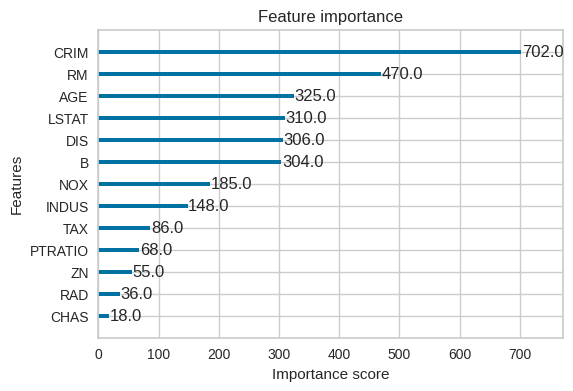

In [19]:
fig, ax = plt.subplots(figsize=(6, 4))
xgb.plot_importance(xgr, ax=ax);
#fig.savefig("images/mlpr_1405.png", dpi=300)

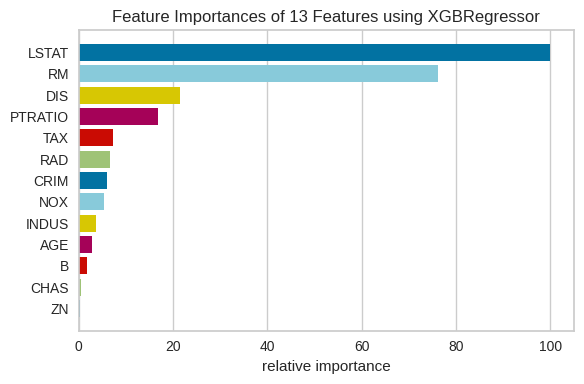

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(xgr)
fi_viz.fit(bos_X_train, bos_y_train)
fi_viz.poof();
#fig.savefig("images/mlpr_1406.png", dpi=300)

In [21]:
booster = xgr.get_booster()
print(booster.get_dump()[0])

0:[RM<6.94299984] yes=1,no=2,missing=2
	1:[LSTAT<14.4300003] yes=3,no=4,missing=4
		3:[DIS<1.38610005] yes=7,no=8,missing=8
			7:[CRIM<8.49213028] yes=15,no=16,missing=16
				15:leaf=6.07144117
				16:leaf=0.732627034
			8:[RM<6.54899979] yes=17,no=18,missing=18
				17:[LSTAT<7.78999996] yes=25,no=26,missing=26
					25:[LSTAT<5.63999987] yes=35,no=36,missing=36
						35:leaf=0.787097394
						36:leaf=0.0659914389
					26:[RM<6.10099983] yes=37,no=38,missing=38
						37:leaf=-0.759166777
						38:leaf=-0.301650971
				18:[LSTAT<7.01000023] yes=27,no=28,missing=28
					27:[PTRATIO<17.8999996] yes=39,no=40,missing=40
						39:leaf=2.06367588
						40:leaf=0.838728786
					28:[DIS<3.4217] yes=41,no=42,missing=42
						41:leaf=1.1530751
						42:leaf=0.18386735
		4:[DIS<2.07879996] yes=9,no=10,missing=10
			9:[CRIM<6.39311981] yes=19,no=20,missing=20
				19:[AGE<88.5] yes=29,no=30,missing=30
					29:leaf=-0.242373005
					30:leaf=-2.37043929
				20:leaf=-3.59292293
			10:[B<316.029999] yes=

In [22]:
import lightgbm as lgb
lgr = lgb.LGBMRegressor(random_state=42)
lgr.fit(bos_X_train, bos_y_train)
lgr.score(bos_X_test, bos_y_test)
lgr.predict(bos_X.iloc[[0]])

array([30.31689569])

In [23]:
for col, val in sorted(
    zip(
        bos_X.columns, lgr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

LSTAT        226.000
RM           199.000
DIS          172.000
AGE          130.000
B            121.000


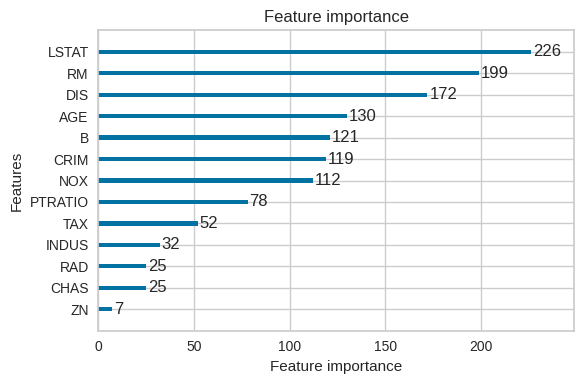

In [24]:
fig, ax = plt.subplots(figsize=(6, 4))
lgb.plot_importance(lgr, ax=ax)
fig.tight_layout()
#fig.savefig("images/mlpr_1408.png", dpi=300)